In [15]:
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('../..')

from src.utils import *

In [2]:
# Loading the data
speeds_train_df = pd.read_csv(resources_path('dataset', 'preprocessed', 'speeds_train_imputed_time.csv.gz'), engine='c').dropna()
sensors_df = pd.read_csv(resources_path('dataset', 'originals', 'sensors.csv.gz'), engine='c')
events_df = pd.read_csv(resources_path('dataset', 'originals', 'events_train.csv.gz'), engine='c')
speeds_train_df.head(5)

,DATETIME_UTC,KEY,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,SPEED_MAX,N_VEHICLES,IMPUTED
0,2018-09-01 00:00:00,0.0,333,231.125907,34.573767,169.890,440.096,150.0,False
1,2018-09-01 00:15:00,0.0,333,225.915947,41.437726,98.698,436.860,225.0,False
2,2018-09-01 00:30:00,0.0,333,228.498770,43.031004,114.878,440.096,148.0,False
3,2018-09-01 00:45:00,0.0,333,231.562904,40.921477,72.810,469.220,197.0,False
4,2018-09-01 01:00:00,0.0,333,229.282707,36.764729,61.484,360.814,147.0,False


In [3]:
sensors_df.head(5)

,KEY,EMERGENCY_LANE,KM,LANES,ROAD_TYPE
0,44.0,0,1410,2,0
1,146.0,0,1473,2,0
2,53.0,0,1421,2,0
3,122.0,0,679,2,0
4,17.0,1,1399,3,1


## Plots hourly

In [4]:
df = pd.merge(speeds_train_df.dropna(), sensors_df, left_on=[KEY, KM], right_on=[KEY, KM])
df[DATETIME] = pd.to_datetime(df.DATETIME_UTC)
df.head(5)

,DATETIME_UTC,KEY,KM,SPEED_AVG,SPEED_SD,SPEED_MIN,SPEED_MAX,N_VEHICLES,IMPUTED,EMERGENCY_LANE,LANES,ROAD_TYPE
0,2018-09-01 00:00:00,0.0,333,231.125907,34.573767,169.890,440.096,150.0,False,1,2,1
1,2018-09-01 00:15:00,0.0,333,225.915947,41.437726,98.698,436.860,225.0,False,1,2,1
2,2018-09-01 00:30:00,0.0,333,228.498770,43.031004,114.878,440.096,148.0,False,1,2,1
3,2018-09-01 00:45:00,0.0,333,231.562904,40.921477,72.810,469.220,197.0,False,1,2,1
4,2018-09-01 01:00:00,0.0,333,229.282707,36.764729,61.484,360.814,147.0,False,1,2,1


In [5]:
grouped_df = df.groupby([ROAD_TYPE, pd.Grouper(key=DATETIME, freq='3600s')])[[DATETIME, SPEED_AVG, N_CARS, 'IMPUTED']].mean()
grouped_df.head(10)

SPEED_AVG  N_VEHICLES   IMPUTED
ROAD_TYPE DATETIME_UTC                                         
0         2018-09-01 00:00:00  195.009980   65.765575  0.250378
          2018-09-01 01:00:00  192.975057   40.166978  0.130633
          2018-09-01 02:00:00  197.118891   29.808827  0.174836
          2018-09-01 03:00:00  199.187428   23.144815  0.188813
          2018-09-01 04:00:00  193.848959   23.084332  0.137816
          2018-09-01 05:00:00  185.963366   29.369520  0.073821
          2018-09-01 06:00:00  184.285979   39.356107  0.043496
          2018-09-01 07:00:00  183.009401   57.932184  0.027969
          2018-09-01 08:00:00  179.238217   77.322808  0.022194
          2018-09-01 09:00:00  175.617485  101.650556  0.026636

In [18]:
grouped_df['IMPUTED'] = grouped_df['IMPUTED'] >= 0.01
grouped_df = grouped_df.reset_index()
grouped_df.head(25)

,index,ROAD_TYPE,DATETIME_UTC,SPEED_AVG,N_VEHICLES,IMPUTED
0,0,0,2018-09-01 00:00:00,195.009980,65.765575,True
1,1,0,2018-09-01 01:00:00,192.975057,40.166978,True
2,2,0,2018-09-01 02:00:00,197.118891,29.808827,True
3,3,0,2018-09-01 03:00:00,199.187428,23.144815,True
4,4,0,2018-09-01 04:00:00,193.848959,23.084332,True
5,5,0,2018-09-01 05:00:00,185.963366,29.369520,True
6,6,0,2018-09-01 06:00:00,184.285979,39.356107,True
7,7,0,2018-09-01 07:00:00,183.009401,57.932184,True
8,8,0,2018-09-01 08:00:00,179.238217,77.322808,True
9,9,0,2018-09-01 09:00:00,175.617485,101.650556,True


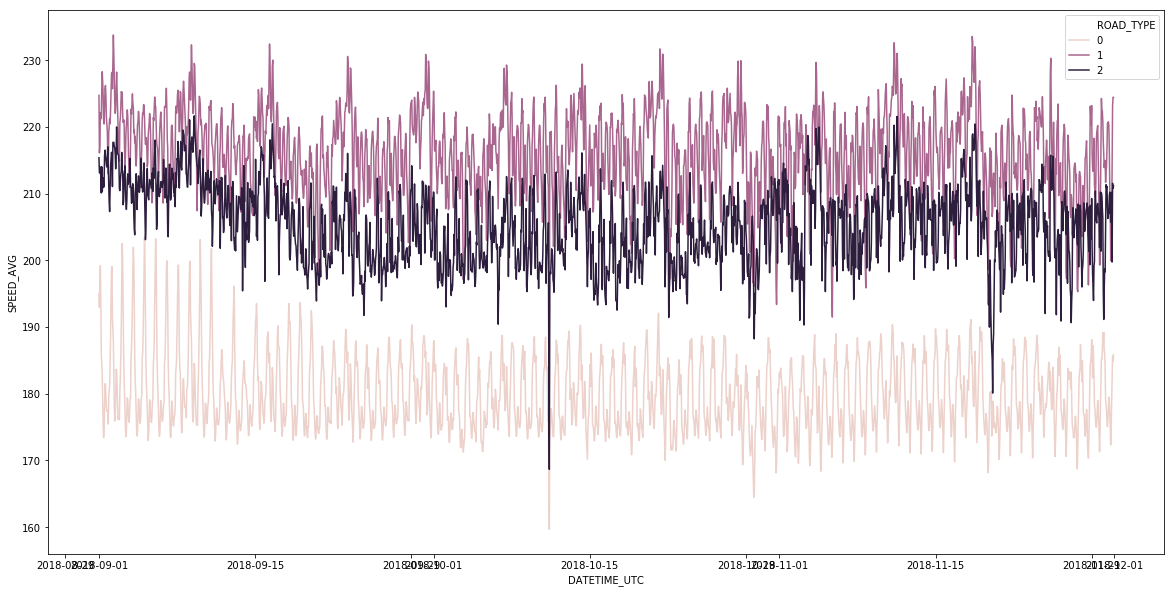

In [17]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=grouped_df.DATETIME_UTC, y=grouped_df.SPEED_AVG, hue=grouped_df.ROAD_TYPE);

SPEED_AVG  N_VEHICLES  IMPUTED
ROAD_TYPE DATETIME_UTC                                        
0         2018-09-01 00:00:00  195.009980   65.765575     True
          2018-09-01 01:00:00  192.975057   40.166978     True
          2018-09-01 02:00:00  197.118891   29.808827     True
          2018-09-01 03:00:00  199.187428   23.144815     True